In [68]:
import os
import sys
import xarray as xr
import dask
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature

import matplotlib.patches as mpatches

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','preprocessing')
raw_dir = os.path.join(proj_dir,'data','analysis','raw')
out_path = os.path.join(proj_dir,'reports','tidal_melting','figures','topography.png')

In [74]:
grd_path = os.path.join(raw_dir,'waom_frc','waom4_grd.nc')
grd = xr.open_dataset(grd_path)
rlon = grd.lon_rho[:,-1]
rlat = grd.lat_rho[:,-1]
llon = grd.lon_rho[:,0]
llat = grd.lat_rho[:,0]
ulon = grd.lon_rho[-1,:]
ulat = grd.lat_rho[-1,:]
lolon = grd.lon_rho[0,:]
lolat = grd.lat_rho[0,:]

In [86]:
lats = np.concatenate([llat,ulat,rlat,lolat])

In [87]:
lons = np.concatenate([llon,ulon,rlon,lolon])

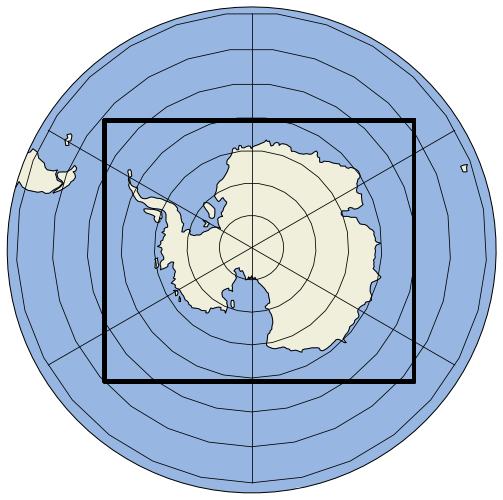

In [99]:
fig = plt.figure(figsize=[10, 5])
ax = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())


ax.gridlines(color='k')

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
#bed.plot(ax=ax,transform=ccrs.SouthPolarStereo())

x, y = [-70,70], [-70,-70]
#x ,y = ccrs.CRS.transform_point(-70,-70,ccrs.PlateCarree())
ax.plot(lons,lats, marker='.', transform=ccrs.PlateCarree(),lw=0.0,color='k')

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.75
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)

plt.show()

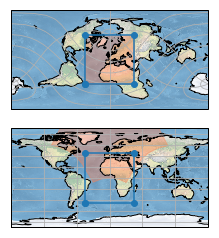

In [49]:
rotated_pole = ccrs.RotatedPole(pole_latitude=45, pole_longitude=180)

box_top = 45
x, y = [-44, -44, 45, 45, -44], [-45, box_top, box_top, -45, -45]

fig = plt.figure()

ax = fig.add_subplot(2, 1, 1, projection=rotated_pole)
ax.stock_img()
ax.coastlines()
ax.plot(x, y, marker='o', transform=rotated_pole)
ax.fill(x, y, color='coral', transform=rotated_pole, alpha=0.4)
ax.gridlines()

ax = fig.add_subplot(2, 1, 2, projection=ccrs.PlateCarree())
ax.stock_img()
ax.coastlines()
ax.plot(x, y, marker='o', transform=ccrs.PlateCarree())
ax.fill(x, y, transform=rotated_pole, color='coral', alpha=0.4)
ax.gridlines()

plt.show()

ValueError: Axes should be an instance of GeoAxes, got <class 'matplotlib.axes._subplots.AxesSubplot'>

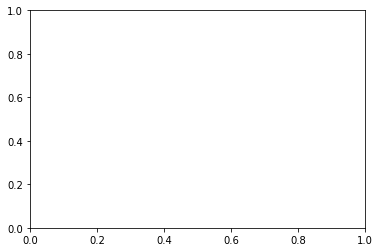

In [18]:
map_proj = ccrs.SouthPolarStereo()
bed.plot(transform=ccrs.PlateCarree(),  # the data's projection
             subplot_kws={'projection': map_proj})

In [1]:
import numpy as np 
import os
import sys
import xarray as xr
import scipy.io as sio
import matplotlib.pyplot as plt
import datetime
import h5py
import bathy_smoother
import pyresample

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','preprocessing')
src_dir = os.path.join(proj_dir,'src')

sys.path.append(src_dir)
#from tools.inverse_polar_stereo import inverse_polar_stereo
#from tools.cartesian_grid_2d import haversine
#from tools.NDinterp import NDinterp
#from tools.smoothing_PlusMinus_rx0 import smoothing_PlusMinus_rx0
#from tools.uvp_masks import uvp_masks


lpsolve55.so not found.
Linear programming method will not be available.


In [2]:
#load rtopo bed and ice topography and resample to rho points
rtopo_path = os.path.join(data_dir,'external','rtopo','RTopo-2.0.1_30sec_*_S30.nc')
rtopo = xr.open_mfdataset(rtopo_path,data_vars='minimal')

rt_lon,rt_lat = np.meshgrid(rtopo.lon.values,rtopo.lat.values)
rt_lon,rt_lat = pyresample.utils.check_and_wrap(rt_lon,rt_lat)

#rt_def = pyresample.geometry.SwathDefinition(lons=rt_lon,lats=rt_lat)
#roms_def = pyresample.geometry.SwathDefinition(lons=lon_rho,lats=lat_rho)

#wf = lambda r: 1/r

#rt_on_roms = pyresample.kd_tree.resample_custom(rt_def,rtopo.bedrock_topography.values,roms_def,\
#                                    radius_of_influence=2000,neighbours=4,weight_funcs=wf)

In [11]:
bed = rtopo.bedrock_topography[::100,::100].load()

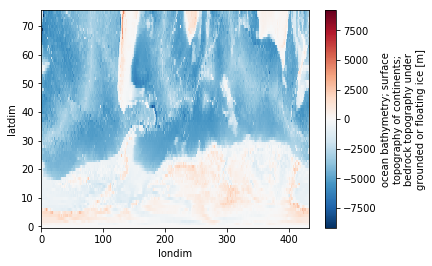

In [12]:
bed.plot()

In [2]:
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm

proj_dir = os.path.join(os.pardir,os.pardir)
data_dir = os.path.join(proj_dir,'data','analysis')
int_dir = os.path.join(data_dir,'interim')
raw_dir = os.path.join(data_dir,'raw')
ext_dir = os.path.join(data_dir,'external')
fig_dir = os.path.join(proj_dir,'reports','devel','figures')

src_dir = os.path.join(proj_dir,'src')
sys.path.append(src_dir)
sys.path.append(os.path.join(src_dir,'tools'))

#%load_ext autoreload
#%autoreload 2
#%aimport tools.make_masks


from log_progress import log_progress
from make_masks import make_mask_sector,make_mask_shelf_sector,make_mask_ice_shelves
from visualization.plot_map import get_vrange

In [3]:
import cartopy.crs as ccrs
import cartopy

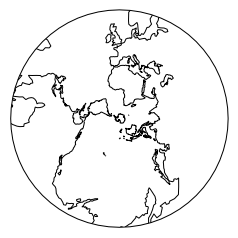

In [15]:
ax = plt.axes(projection=ccrs.SouthPolarStereo(0.0,-70))
ax.coastlines()

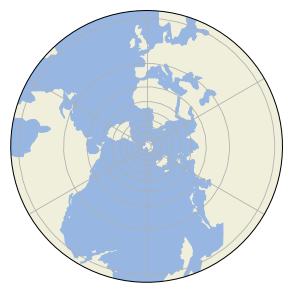

In [5]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature

import matplotlib.patches as mpatches



fig = plt.figure(figsize=[10, 5])
ax2 = plt.subplot(projection=ccrs.SouthPolarStereo())
# Limit the map to -60 degrees latitude and below.
ax2.gridlines()

ax2.add_feature(cartopy.feature.LAND)
ax2.add_feature(cartopy.feature.OCEAN)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

#ax2.add_patch(mpatches.Rectangle(xy=[-90, -90], width=10, height=10,
                               # facecolor='k',edgecolor='k',
                               # alpha=1.0,
                               # transform=ccrs.PlateCarree(),fill=False)
             #)

ax2.set_boundary(circle, transform=ax2.transAxes)

plt.show()



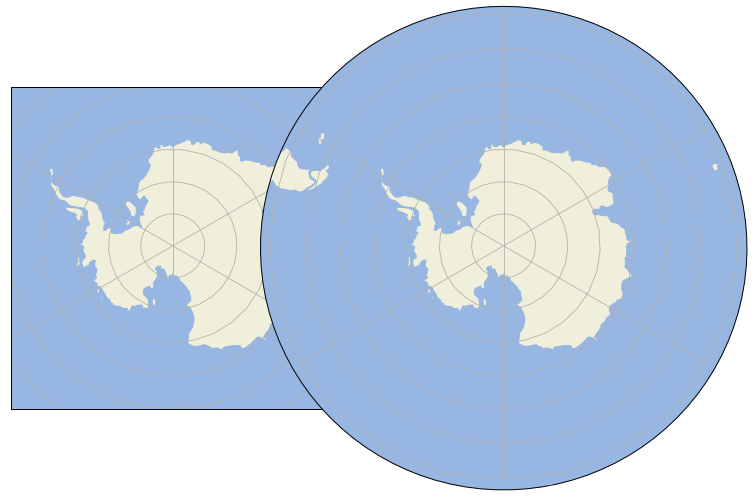

In [28]:
fig = plt.figure(figsize=[10, 5])
ax1 = plt.subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = plt.subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(),
                  sharex=ax1, sharey=ax1)
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)

ax1.gridlines()
ax2.gridlines()

ax2.add_feature(cartopy.feature.LAND)
ax2.add_feature(cartopy.feature.OCEAN)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.75
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)




ax2.set_boundary(circle, transform=ax2.transAxes)
ax1.add_patch(mpatches.Rectangle(xy=[-90, -90], width=100, height=100,
                                facecolor='k',edgecolor='k',
                                alpha=1.0,
                                transform=ccrs.SouthPolarStereo(),fill=False)
             )

plt.show()

In [45]:
mpatches.Rectangle?

In [27]:
#load grid
#grd_path = os.path.join(int_dir,'grd2_dV.nc')
grd_path = os.path.join(raw_dir,'waom_frc','waom4_grd.nc')
grd = xr.open_dataset(grd_path)

In [35]:

grd.lat_rho[1,1]

<xarray.DataArray 'lat_rho' ()>
array(-54.10573)
Attributes:
    long_name:      latitude of RHO-points
    standard_name:  latitude
    units:          degree_north

In [7]:
def plot_map(da,title,cbar_label,cmap,vrange=None,cb_ext='both',ls='xx-large',grd=grd,
             sb=False,secb=False,trans=False,save=False):
        
    vmin,vmax = get_vrange(da,vrange)
    
    plt.close()
    fig,ax = plt.subplots(figsize=(9,11))
    ax.axis('off')
    ax.set_aspect('equal')
    ax.contourf(grd.mask_rho.where(grd.mask_rho==0),colors=(('0.6','0.6','0.6')))   
    cp = da.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap,add_colorbar=False)
    
    
    if sb:
        for key,data in log_progress(shelves.items(),name='shelves'):
               ax.contour(xr.DataArray(data['mask'],dims=('eta_rho','xi_rho')),
                          colors=('black'),linewidths=0.1)
    if secb:            
        for k,sec_mask in mask_sector.items():
            sec_mask.where((grd.mask_rho ==1)&(grd.zice==0.0)).plot.contour(colors=('white'),
                                                                                      linewidths=0.2,ax=ax)
            
    if trans:
        for lon,lat_min,lat_max in trans:
            mask = (grd.mask_rho == 1) & (grd.lat_rho>=lat_min) & (grd.lat_rho<=lat_max)
            ax.contour(grd.lon_rho.where(mask),levels=[[lon]],colors=('white'),linewidths=1,
                  linestyles='dotted')
            
    ax.contour(grd.zice.where(grd.mask_rho==1), levels=['-0.1'], colors=('black'),linewidths=0.1)
    #ax.contour(grd.h.where((grd.zice == 0)), levels=['1500'], colors=('black'),linewidths=0.3)
    ax.contour(grd.mask_rho, colors=('black'),linewidths=0.1)
    
    lons= np.arange(-170,170,10)
    mask_lons = (grd.lon_rho < 176) & (grd.lon_rho > -176) & (grd.mask_rho == 1)
    
    lons = ax.contour(grd.lon_rho.where(mask_lons),levels=lons,colors='white',linewidths=0.2)
    ax.contour(grd.lon_rho.where(grd.mask_rho),levels=[-179.9],colors='white',linewidths=0.2)
    ax.contour(grd.lat_rho.where(grd.mask_rho),levels=np.arange(-90,-50,5),colors='white',linewidths=0.2)
    
    cb = plt.colorbar(cp, ax=ax, orientation="horizontal", pad=0.01, extend=cb_ext)
    cb.set_label(label=cbar_label, size=ls, weight='bold')
    cb.ax.tick_params(labelsize=ls)    
    ax.set_title(title,fontsize=16)
    
    plt.tight_layout()
    if save==True:
        plt.savefig(os.path.join(fig_dir,'map_'+title.replace('/','_')+'.png'),format='png',bbox_inches = "tight")
    elif save=='hr':
        plt.savefig(os.path.join(fig_dir,'map_'+title.replace('/','_')+'.png'),format='png',dpi=300,bbox_inches = "tight")
    plt.show()
    

In [10]:
grd.zice.max()

<xarray.DataArray 'zice' ()>
array(0.)

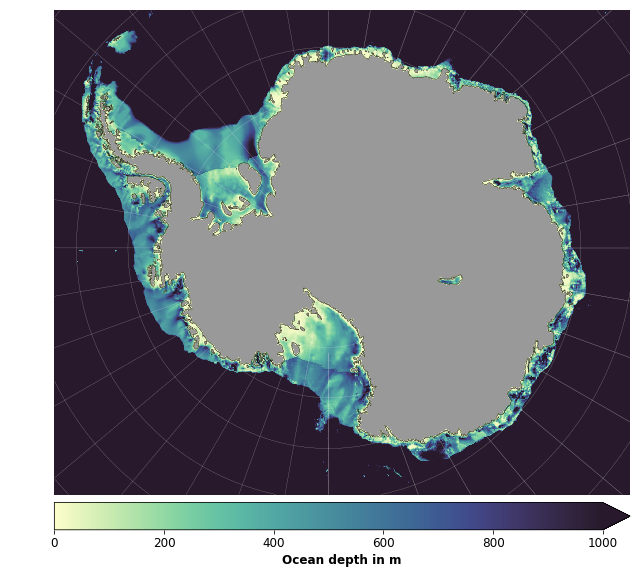

In [12]:
mask = (grd.mask_rho == 1)
plot_map((grd.h+grd.zice).where(mask),'','Ocean depth in m',ocm.deep,[0,1000],cb_ext='max',
         ls ='large',save=False,sb=False,secb=False)

<IPython.core.display.Javascript object>


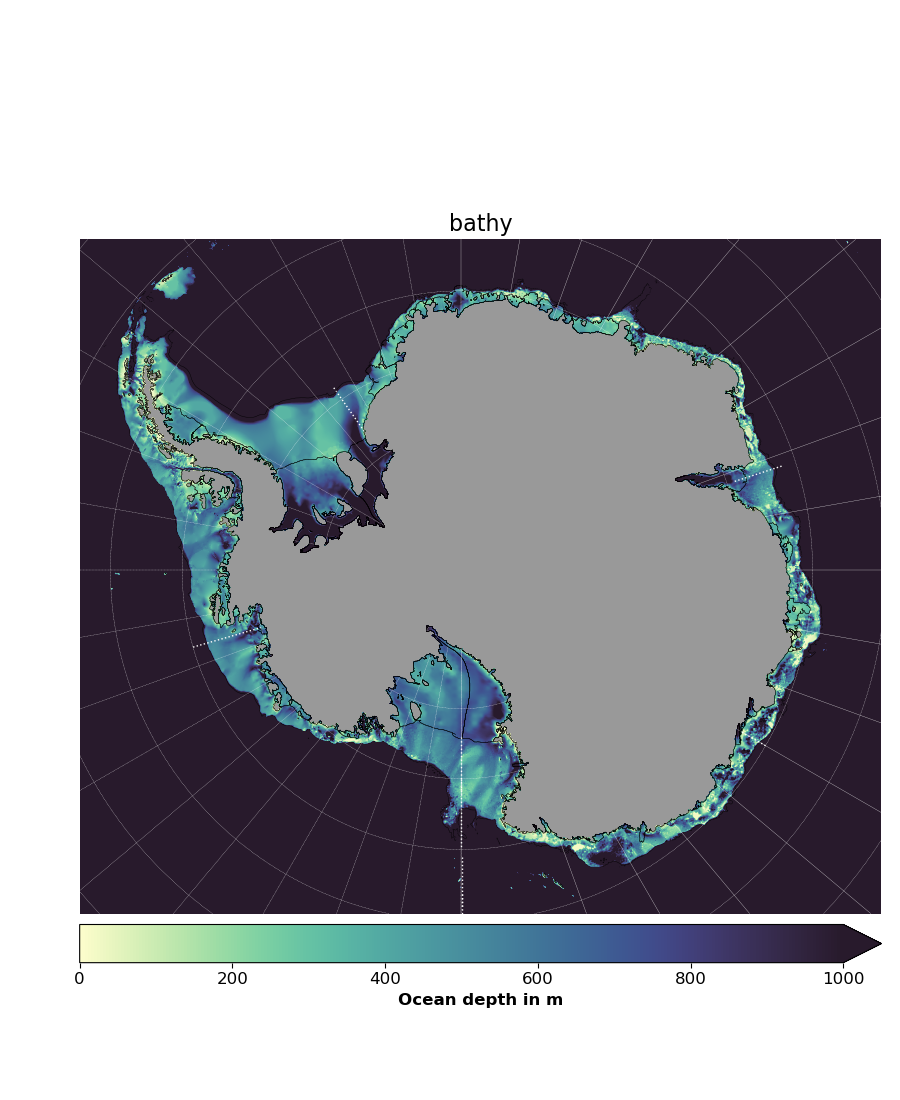

In [10]:
mask = (grd.mask_rho == 1)
#trans = [[-45,-80,-55],[180,-89,-66],[-75,-70,-62],[70,-70,-59]]
trans = [[120,-66.9,-65],[-106,-75,-70],[72,-69.5,-66],[-35,-78,-74]]
plot_map((grd.h).where(mask),'bathy','Ocean depth in m',ocm.deep,[0,1000],cb_ext='max',
         ls ='large',save='hr',trans=trans,sb=True,secb=False)

In [20]:
1-grd.mask_rho.sum()/np.ones_like(grd.mask_rho).sum()

<xarray.DataArray 'mask_rho' ()>
array(0.362663)

In [22]:
grd.dz.isel(s_rho=30).where((grd.zice<0) & (grd.mask_rho==1))

<xarray.DataArray (eta_rho: 2650, xi_rho: 3150)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: eta_rho, xi_rho

<IPython.core.display.Javascript object>


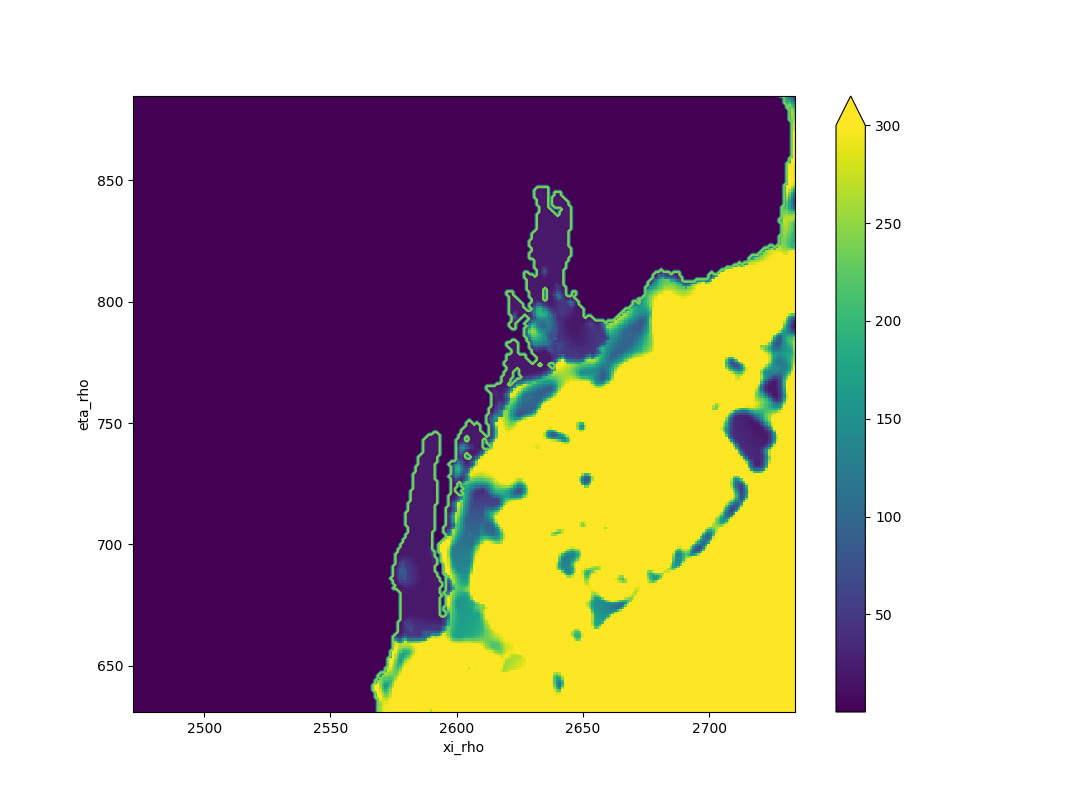

In [7]:
%matplotlib notebook
plt.close()
(grd.h+grd.zice).plot(size=8,vmax = 300)
grd.mask_rho.plot.contour()
plt.show()

In [56]:
mask_ant = np.zeros_like(grd.mask_rho.values)

for k,v in shelves.items():
    mask_ant[v['mask']]=1
    
mask = (mask_ant == 0) & (grd.zice<0) & (grd.mask_rho == 1)
mask.any()

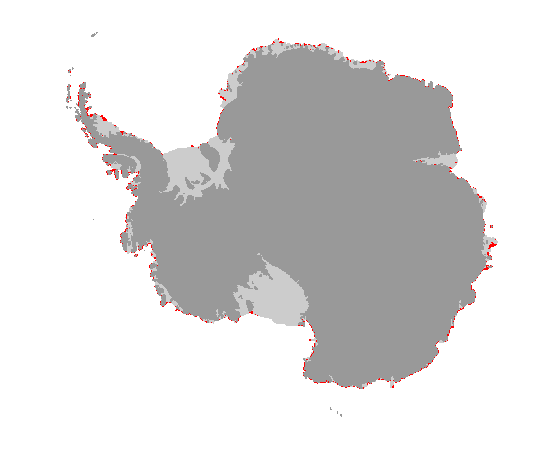

In [65]:
title = 'antbounds_bedmap'
plt.close()
fig,ax = plt.subplots(figsize=(9,11))
ax.axis('off')
ax.set_aspect('equal')

ax.contourf(grd.mask_rho.where(grd.zice<0),colors=(('0.8','0.8','0.8')))

ax.contourf(grd.mask_rho.where(mask),colors='red')
ax.contourf(grd.mask_rho.where(grd.mask_rho==0),colors=(('0.6','0.6','0.6')))
plt.savefig(os.path.join(fig_dir,'map_'+title.replace('/','_')+'.png'),format='png',dpi=300,bbox_inches = "tight")
plt.show()

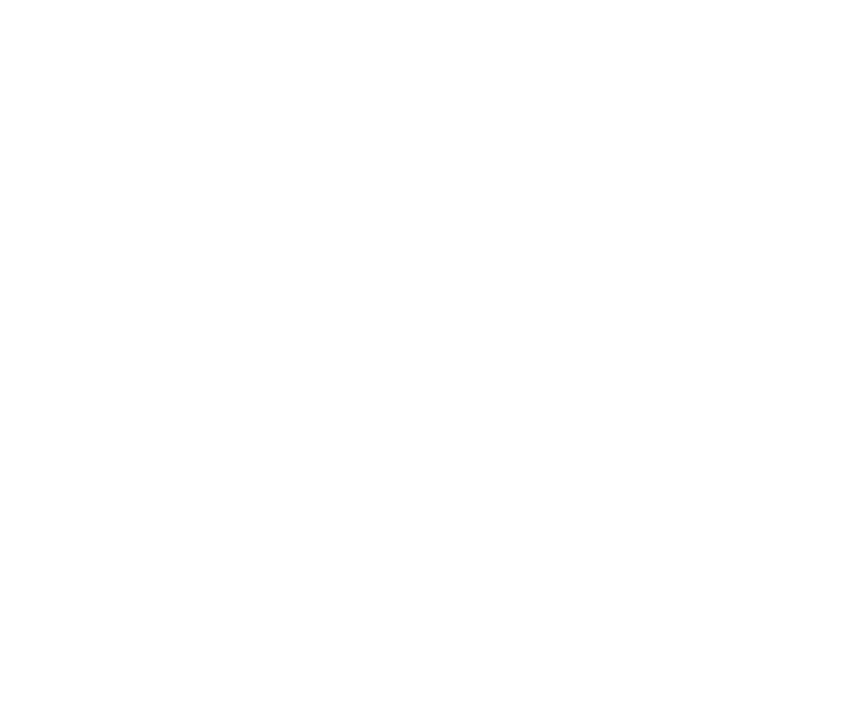

In [34]:
plt.close()
fig,ax = plt.subplots(figsize = (15,10))
img = grd.mask_rho.where(mask).plot(ax=ax,add_colorbar=False)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()
#plt.savefig(os.path.join(fig_dir,'size_mask.png'),transparent=True,dpi=300)
plt.show()

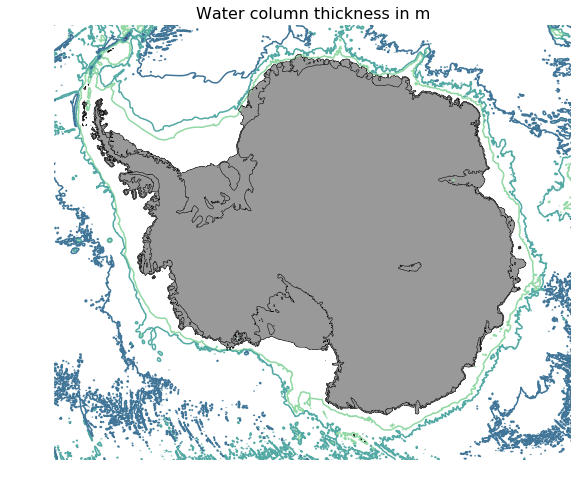

In [4]:
%matplotlib inline
land_zice = (grd.mask_rho==0) | (grd.zice < 0.0)


plt.close()
fig,ax = plt.subplots(figsize=(10,8))
ax.contourf(grd.mask_rho.where(land_zice).values,colors=(('0.6','0.6','0.6')))

(grd.h+grd.zice).where(grd.mask_rho).plot.contour(cmap=ocm.deep,ax=ax)

ax.contour(-grd.zice.where(grd.mask_rho).values, levels=['0.01'], colors=('black'),linewidths=0.5)
ax.contour(grd.mask_rho.values, levels=['0.01'], colors=('black'),linewidths=0.5)
plt.title('Water column thickness in m', fontsize=16)
ax.set_aspect('equal')
ax.axis('off')
plt.savefig(out_path,format='png',dpi=300)
plt.show()

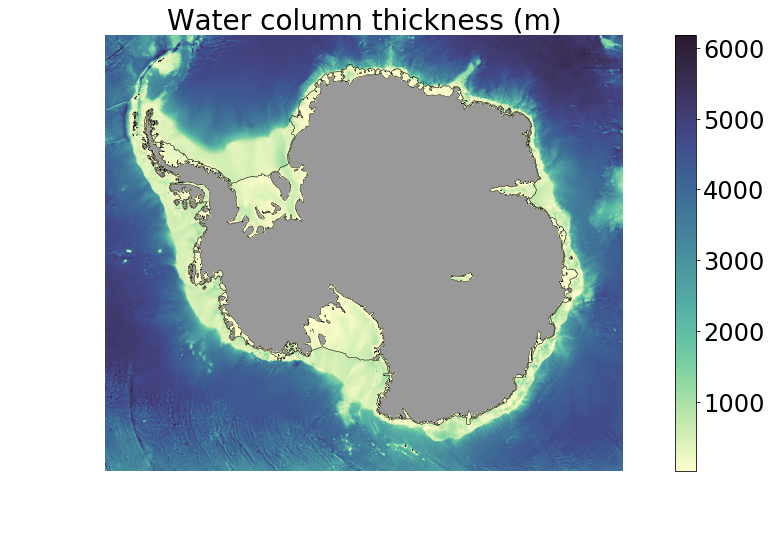

In [23]:
import matplotlib

plt.close()
fig,ax = plt.subplots(figsize=(15,8))
ax.contourf(grd.mask_rho.values,colors=(('0.6','0.6','0.6')))
(grd.h+grd.zice).where(grd.mask_rho).plot(cmap=ocm.deep,cbar_kwargs={'label':''})
ax.contour(-grd.zice.where(grd.mask_rho).values, levels=['0.01'], colors=('black'),linewidths=0.5)
ax.contour(grd.mask_rho.values, levels=['0.01'], colors=('black'),linewidths=0.5)
matplotlib.rcParams.update({'font.size': 24}) 
plt.title('Water column thickness (m)', fontsize=28)
ax.set_aspect('equal')
ax.axis('off')
plt.tight_layout()

if out_path:
    plt.savefig(out_path,format='png',dpi=375)
plt.show()